In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [8]:
data = pd.read_csv("C:/Users/dgkn5/CSV/knn\KNNAlgorithmDataset.csv")

In [9]:
data.head() # first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data.drop(["Unnamed: 32","id"],axis=1 , inplace = True)

In [12]:
M = data[data.diagnosis == "M"]  # kötü huylu
B = data[data.diagnosis == "B"]  # iyi huylu

In [13]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [14]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

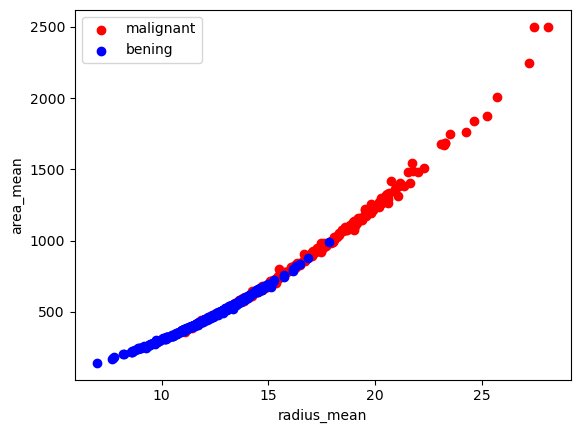

In [15]:
plt.scatter(M.radius_mean, M.area_mean, color = "red", label = "malignant")
plt.scatter(B.radius_mean, B.area_mean, color = "blue", label = "bening")
plt.legend()
plt.xlabel("radius_mean")   # horizontal
plt.ylabel("area_mean")     # vertical
plt.show()

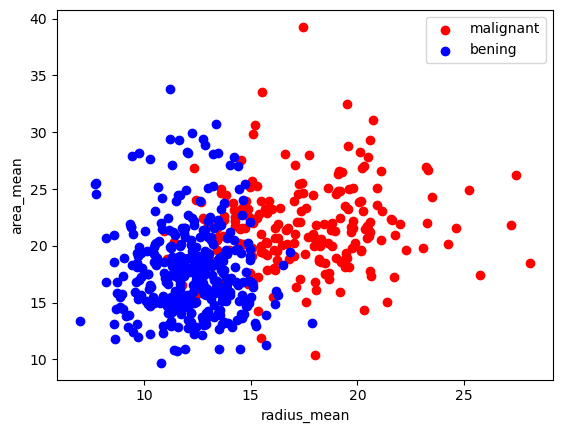

In [16]:
plt.scatter(M.radius_mean, M.texture_mean, color ="red", label ="malignant")
plt.scatter(B.radius_mean, B.texture_mean, color ="blue", label ="bening")
plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.show()

In [17]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 

In [18]:
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [19]:
y = data.diagnosis.values

In [20]:
x_data= data.iloc[:,1:3].values

In [21]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # en yakın 3 komşuyu kontrol eder
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
prediction = knn.predict(x_test)

In [25]:
prediction

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [26]:
print("k.{}, score:{} ".format(3,knn.score(x_test,y_test)))

k.3, score:0.8421052631578947 


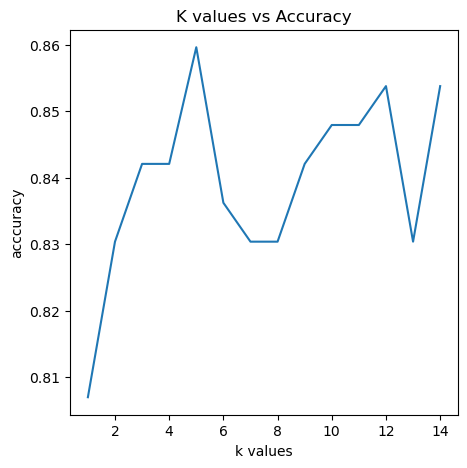

Best accuracy is 0.8596491228070176 with K = 5


In [27]:
test_accuracy=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title("K values vs Accuracy")
plt.xlabel("k values")
plt.ylabel("acccuracy")

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

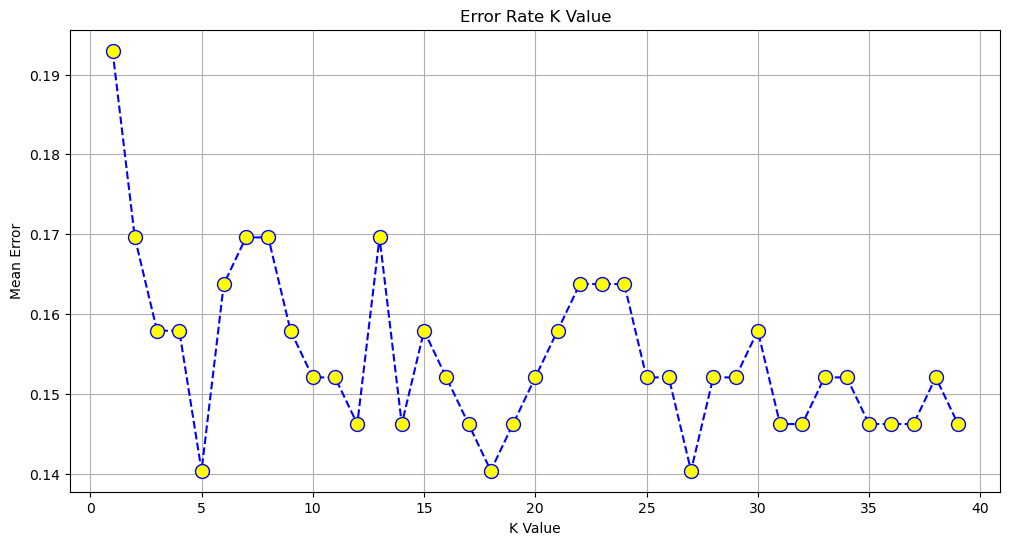

In [28]:
error = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='blue',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

## Cross Validation

In [44]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [45]:
x,y = iris.data,iris.target

In [46]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [47]:
model = LinearRegression()

In [48]:
scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    score = mean_squared_error(y_test,y_pred)
    scores.append(score)

In [49]:
mean_score = np.mean(scores)

In [51]:
print("k fold cross validation result :",scores)
print("MSE:",mean_score)

k fold cross validation result : [0.03711379440797689, 0.04287733169764373, 0.053395130468897614, 0.0631642504489177, 0.047794600654438364]
MSE: 0.04886902153557486


## Confusion Matrix

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

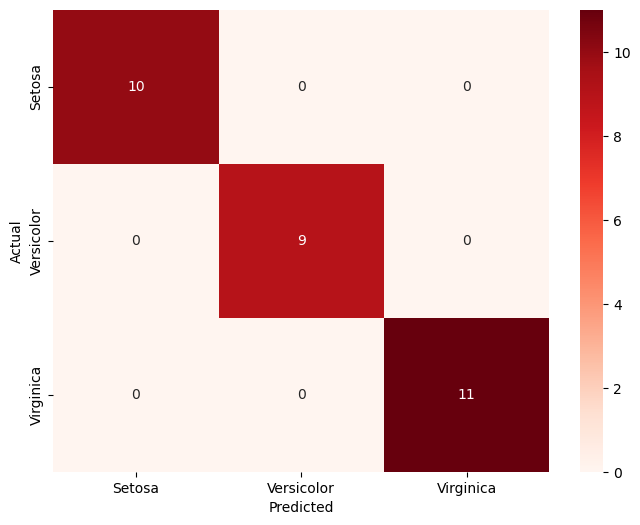

In [57]:
iris = load_iris()
x_train, x_test, y_train, t_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

cm = confusion_matrix(t_test,y_pred)
labels = ["Setosa","Versicolor","Virginica"]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Reds)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

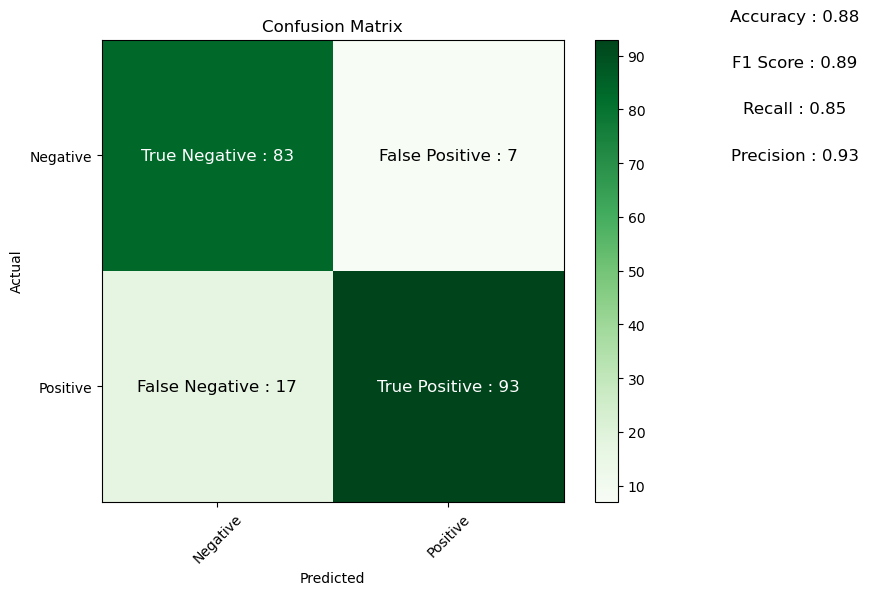

In [59]:
x,y = make_classification(n_samples=1000,n_classes=2,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=120)

clf = LogisticRegression()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

cm=confusion_matrix(y_test,y_pred)

tn,fp,fn,tp = cm.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Greens",interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks=np.arange(2)
plt.xticks(tick_marks,["Negative","Positive"],rotation=45)
plt.yticks(tick_marks,["Negative","Positive"])
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
           
plt.text(0,0, f"True Negative : {tn}",ha="center",va="center",color="white",fontsize=12)
plt.text(0,1, f"False Negative : {fn}",ha="center",va="center",color="black",fontsize=12)   
plt.text(1,0, f"False Positive : {fp}",ha="center",va="center",color="black",fontsize=12)
plt.text(1,1, f"True Positive : {tp}",ha="center",va="center",color="white",fontsize=12)
           
plt.text(2.5,0, f"Precision : {precision:.2f}",ha="center",va="center",color="black",fontsize=12)
plt.text(2.5,-0.2, f"Recall : {recall:.2f}",ha="center",va="center",color="black",fontsize=12)   
plt.text(2.5,-0.4, f"F1 Score : {f1_score:.2f}",ha="center",va="center",color="black",fontsize=12)
plt.text(2.5,-0.6, f"Accuracy : {accuracy:.2f}",ha="center",va="center",color="black",fontsize=12)
           
plt.show()